In [1]:
from statistics import mean
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
df = pd.read_csv('../../datasets/ventas_enero_2020.csv')
df.head()

,ip,compra,fecha
0,0146.0104.0044.0034,0,2020-01-01
1,0166.0231.0189.0175,1,2020-01-01
2,0031.0086.0235.0176,0,2020-01-01
3,0128.0126.0101.0178,0,2020-01-01
4,0096.0176.0164.0068,0,2020-01-01


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ip      1500 non-null   object
 1   compra  1500 non-null   int64 
 2   fecha   1500 non-null   object
dtypes: int64(1), object(2)
memory usage: 35.3+ KB


In [5]:
df.compra

0       0
1       1
2       0
3       0
4       0
       ..
1495    1
1496    0
1497    0
1498    0
1499    0
Name: compra, Length: 1500, dtype: int64

In [7]:
# media de bernoullies
df.compra.mean()

0.2846666666666667

In [8]:
estimacionz_ventas = stats.binom(100, df.compra.mean())
estimacionz_ventas

In [9]:
y = [x for x in range(101)]

In [10]:
from scipy.stats import binom

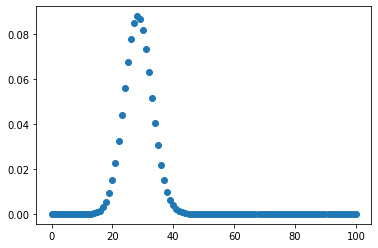

In [11]:
plt.scatter(y, estimacionz_ventas.pmf(y));

In [12]:
estimacionz_ventas.interval(0.95)

(20.0, 37.0)

In [13]:
vinos = pd.read_csv('../../datasets/winemag-data-130k-v2.csv')
vinos.head(2)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos


In [14]:
vinos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             129971 non-null  int64  
 1   country                129908 non-null  object 
 2   description            129971 non-null  object 
 3   designation            92506 non-null   object 
 4   points                 129971 non-null  int64  
 5   price                  120975 non-null  float64
 6   province               129908 non-null  object 
 7   region_1               108724 non-null  object 
 8   region_2               50511 non-null   object 
 9   taster_name            103727 non-null  object 
 10  taster_twitter_handle  98758 non-null   object 
 11  title                  129971 non-null  object 
 12  variety                129970 non-null  object 
 13  winery                 129971 non-null  object 
dtypes: float64(1), int64(2), object(11)


In [15]:
vinos.drop('Unnamed: 0', axis=1, inplace=True)

In [16]:
vinos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   country                129908 non-null  object 
 1   description            129971 non-null  object 
 2   designation            92506 non-null   object 
 3   points                 129971 non-null  int64  
 4   price                  120975 non-null  float64
 5   province               129908 non-null  object 
 6   region_1               108724 non-null  object 
 7   region_2               50511 non-null   object 
 8   taster_name            103727 non-null  object 
 9   taster_twitter_handle  98758 non-null   object 
 10  title                  129971 non-null  object 
 11  variety                129970 non-null  object 
 12  winery                 129971 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 12.9+ MB


In [17]:
vinos.describe()

,points,price
count,129971.000000,120975.000000
mean,88.447138,35.363389
std,3.039730,41.022218
min,80.000000,4.000000
25%,86.000000,17.000000
50%,88.000000,25.000000
75%,91.000000,42.000000
max,100.000000,3300.000000


### Prueba Z

Es la manera estadística de probar nuestra hipótesis si:
* Conocemos la varianza de la población o
* No conocemos la varianza, pero nuestra muestra es $n>=30$ \\

Tenemos que \\

$Z =\frac{\bar x - \mu}{\frac {\sigma}{\sqrt n}}$ \\
donde \\
$
\bar x $ = Media de la muestra \\
$\mu $= media de la población \\
$\sigma $ = Desviación estándar de la población \\
$n $= Tamaño de la muestra

Ejemplo:

En este dataset de reviews de vinos, vamos a asumir que los datos  de puntaje de los vinos están distribuidos de forma
normal.
--->Points: The number of points WineEnthusiast rated the wine on a scale of 1-100<---

Entonces definimos nuestra media poblacional ($\mu$) y desviación estándar ($\sigma$). Estos serán nuestros
parámetros. Estamos asumiendo aquí que los datos que tenemos son los datos de la población, sin muestreo.

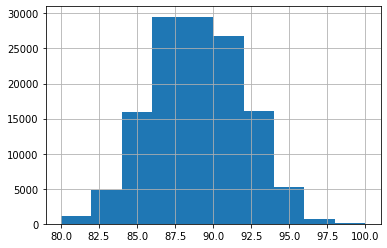

In [18]:
vinos.points.hist();

In [19]:
points = vinos.points
mu = points.mean()
sigma = points.std()
print(mu)
print(sigma)

88.44713820775404
3.039730202916003


# Ejemplo

Suponiendo que tengo una muestra de n=10 puntajes de vinos con una media muestral de $\bar{x}$ = 90.2.
Esta muestra viene de la misma población que las evaluaciones que tengo aquí?

Para probar, vamos a utilizar una prueba z de 1 muestra. Primero, declaramos hipótesis nula e hipótesis alternativa:

$H_0$: La muestra es de la misma población de enólogos -> $\bar{x} = \mu$

$H_A$: La muestra no viene de la misma población de enólogos -> $\bar{x} \neq \mu$

Enseguida, específicamos qué nivel de significancia vamos a utilizar. En estadística, un nivel de signficancia común
es el de $\alpha \leq 0.05$. Vamos a comprobar utilizando un $\alpha = 0.05$

Luego, vamos a nuestra [tabla z] para buscar el valor crítico de z que corresponde con este nivel de significancia.
Nuestra prueba tendrá 2 colas porque no nos importa si la media muestral es mayor o menor que la media poblacional.
Solamente estamos probando si son iguales o diferentes.

[tabla z]: https://www.sjsu.edu/faculty/gerstman/StatPrimer/z-two-tails.pdf



In [20]:
# se obtiene de la tabla z dependiendo el grado de exactitud deseado
z_test = 1.65
x_bar = 90.2
print(mu)
print(sigma)
n = 10

88.44713820775404
3.039730202916003


In [21]:
standard_error = sigma / np.sqrt(n)
z_stat = (x_bar - mu) / standard_error
z_stat

1.8235288387320392

In [22]:
if z_stat < z_test:
    print(f'Valor de z:{z_stat}, menor que {z_test}\n No podemos rechazar la hipotesis')
else:    
    print(f'Valor de z:{z_stat}, mayor que {z_test}\n podemos rechazar la hipotesis, con una confianza del 90%')

Valor de z:1.8235288387320392, mayor que 1.65
 podemos rechazar la hipotesis, con una confianza del 90%


Calculamos el valor de z para nuestra media muestral comparada con la media poblacional dividiendo la diferencia
entre las dos medias entre la desviación estándar de la muestra, que es el error estándar: $\frac{\sigma}{\sqrt{n}}$.

Si este estadístico es menor que nuestro valor crítico de z, entonces no rechazamos la hipótesis nula; de
lo contrario, rechazamos la hipótesis nula en favor de la alternativa.

### Prueba T

En el ejercicio anterior, asumimos que conocemos la media y desviación estándar poblacional, entonces estamos
comparando nuestra muestra con esta población. Sin embargo, durante la mayoría de las veces no vamos a conocer estos
datos.

Nos permite medir nuestra hipótesis cuando:
* No conocemos la varianza de la población
* Nuestra muestra es pequeña, n < 30 

$t$ = $
\frac {\bar x - \mu}{\frac {s}{\sqrt n}}
$ \\
donde \\
$
\bar x $ = Media de la muestra \\
$\mu $= media de la población \\
$s $ = Desviación estándar de la muestra \\
$n $= Tamaño de la muestra



![alt text](https://andyjconnelly.files.wordpress.com/2017/05/distributions1.png 'Ejemplo Normal vs T-Student')

Entonces, si no conocemos los parámetros de nuestra población, pero sabemos que la distribución de nuestra muestra se
 asemeja a la normal (simétrica con tendencia a la media), lo más probable es que tengamos una distribución T de
 Student. En esta distribución, cuanto mayor la muestra, más similar a la normal será.

 La prueba T es calculada de forma semejante a la prueba z, pero está basada en esta distribución y por lo tanto
 tiene valores de referencia distintos.

### Prueba T de 1 Muestra

Supongamos que tengo una muestra y quiero comparar con un valor específico. En nuestro ejemplo, vamos a suponer que
yo sé que la evaluación promedio de los vinos en Francia es de 88, y quiero saber si los vinos nuevos ("Nouveau") tiene
una media de evaluación semejante a la población general. Voy a probar lo mismo con los vinos que están designados
como "Prestige"

En este caso, usamos una Prueba T de 1 sola muestra, ya que estamos comparando el valor de esta media con un valor de
 referencia (benchmark).

Nuestras hipótesis:

$H_0$: $\bar{x} - \mu = 0$ - es decir, no hay diferencia entre la media muestral y $\mu$.

$H_A$: $\bar{x} - \mu \neq 0$ - prueba de dos colas

$\alpha = 0.05$

Aquí veo en mi [tabla T]

[tabla T]: https://www.sjsu.edu/faculty/gerstman/StatPrimer/t-table.pdf


---

In [23]:
vinos[vinos.country == 'France'].head(2)

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
7,France,This dry and restrained wine offers spice in p...,NaN,87,24.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Trimbach 2012 Gewurztraminer (Alsace),Gewürztraminer,Trimbach
9,France,This has great depth of flavor with its fresh ...,Les Natures,87,27.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Jean-Baptiste Adam 2012 Les Natures Pinot Gris...,Pinot Gris,Jean-Baptiste Adam


In [24]:
frances = vinos[vinos.country == 'France'].points
fr_n = vinos[(vinos.country == 'France')&(vinos.designation == 'Nouveau')].points

C:\Users\lgutierrez\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\lgutierrez\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


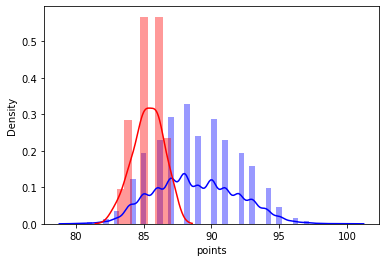

In [31]:
plt.figure()
sns.distplot(frances, hist=True, color='b');
sns.distplot(fr_n, hist=True, color='r');

In [32]:
stats.ttest_1samp(fr_n, frances.mean())

Ttest_1sampResult(statistic=-19.801986102576723, pvalue=6.082659615924452e-21)

# Two Sample Hypothesis Tests with Scipy

# Matched Pairs

Significa que los datos en las dos muestras son dependientes. (las dos muestras son dependientes, contienen al mismo grupo de personas)



In [27]:
pen = pd.read_csv('../../datasets/pinguinos.csv')
pen

,huevo_chico,huevo_grande
0,79,133
1,93,143
2,100,164
3,105,171
4,101,165
5,96,159
6,96,162
7,109,170
8,70,127
9,71,133


In [33]:
from scipy.stats import ttest_rel, ttest_1samp

In [34]:
ttest_rel(pen.huevo_chico, pen.huevo_grande)

Ttest_relResult(statistic=-39.6385073836747, pvalue=2.4963107834499585e-12)

In [35]:
ttest_1samp(pen.huevo_chico - pen.huevo_grande, 0)

Ttest_1sampResult(statistic=-39.6385073836747, pvalue=2.4963107834499585e-12)

---
# Independent Samples

---



**Independent Samples**

Consideramos aquellos casos  en los que tenemos dos o más ejemplos que no hacen match entre ellos. Por ejemplo A/B test en páginas web dado que un usuario ve una interfaz diferente a los otros. 

Se deben cumplir ciertos estatutos:


1.   Independencia de los datos: Que un dato no afecte al otro
2.   Las muestras fueron tomadas aleatoriamente de una población que se distribuye normalmente

Podemos tener dos casos:


1.   Varianzas iguales 
2.   Varianzas diferentes

Nuesta hipótesis aquí son:

$
H_0 = \mu_1 = \mu_2 \\
H_1 = \mu_1 \neq \mu_2
$


In [36]:
df_medi = pd.read_csv('../../datasets/medicamentos.csv')
df_medi.head()

,Sexo,Trat,Puntaje
0,Hombre,Control,10.155054
1,Hombre,Control,11.194200
2,Hombre,Control,11.759109
3,Hombre,Control,9.358012
4,Hombre,Control,11.300387


In [37]:
df_medi.Trat.unique()

array(['Control', 'Trat1', 'Trat2'], dtype=object)

In [38]:
df_medi.pivot_table(values='Puntaje', index='Trat', columns='Sexo')

Sexo,Hombre,Mujer
Trat,,
Control,10.824535,11.201002
Trat1,6.596051,5.140778
Trat2,7.688968,7.920856


In [39]:
import seaborn as sns

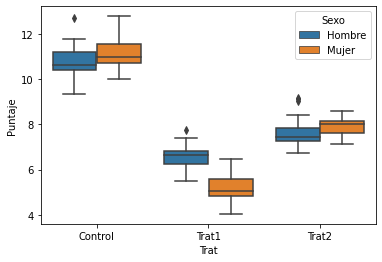

In [52]:
sns.boxplot(x='Trat', y='Puntaje', hue='Sexo', data=df_medi);

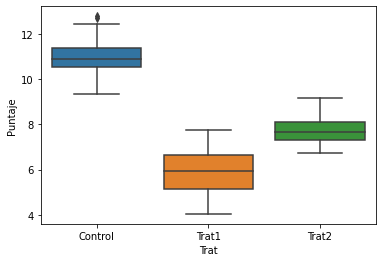

In [44]:
sns.boxplot(x='Trat', y='Puntaje', data=df_medi);

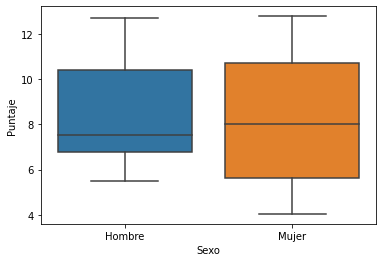

In [45]:
sns.boxplot(x='Sexo', y='Puntaje', data=df_medi);

In [46]:
from scipy.stats import ttest_ind

In [48]:
a = df_medi[df_medi.Trat=='Control'].Puntaje
b = df_medi[df_medi.Trat=='Trat1'].Puntaje
c = df_medi[df_medi.Trat=='Trat2'].Puntaje

In [50]:
# cuando la varianza es igual
ttest_ind(c, a, equal_var=True)

Ttest_indResult(statistic=-21.460179196778043, pvalue=1.8271430334190028e-34)

In [51]:
# cuando la varianza es diferente
ttest_ind(c, b, equal_var=False)

Ttest_indResult(statistic=11.016690650891123, pvalue=1.680578506549734e-16)